In [ ]:
import numpy as np  #importing numpy for numerical operations of arrays
import pandas as pd #importing pandas for data analysis

#importing matplotlib and seaborn for visualization of plots amnd analysis
import seaborn as sns              
import matplotlib.pyplot as plt
%matplotlib inline 

#importing sklearn library for machine learning modules
from sklearn.preprocessing import LabelEncoder  #label encoder to convert numerical to categorical
from sklearn.model_selection import train_test_split #splitting final train dataset to train and validation
from sklearn.utils import resample  #library used for upsampling and downsampling
from sklearn.preprocessing import StandardScaler #to bring all the numerical values in the same range of mean 0 & S.D +- 1

#importng model building libraries
from sklearn import linear_model #Importing linear mofel library for logistic Regression
from sklearn.svm import SVC #Importing Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier #Importing rfc  
from sklearn.model_selection import GridSearchCV    #GridSearchCV for hyper-paramater tuning
from sklearn import metrics   #Metrics to calculate accuracy of the model

import warnings   #useful to alert the user of some condition in a program,
warnings.filterwarnings("ignore") #to ignore version warnings

In [ ]:
#reading final merged train dataset which is active to build bodel after all EDA process
train_df = pd.read_csv('final_train_dataset.csv')

In [ ]:
#setting up interface display values
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500
train_df.head()

,FlightNumber,DayOfWeek,Origin,Destination,Distance,DateTimeStamp,ScheduledArrTime_c,FlightDelayStatus,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,AirportID,StationHeight,Latitude,Longitude,TimeZone
0,BOI_SFO_31365,3,BOI,SFO,522,2004-01-01 07:39:00,2004-01-01 07:39:00,2,23234,FEW022 SCT026 OVC033,2.5,54.0,83.0,27.0,180,29.77,0.2,SFO,18.0,37.37,-122.24,5
1,PHL_CVG_49031,3,PHL,CVG,507,2004-01-01 08:14:00,2004-01-01 08:14:00,2,93814,SCT250,10.0,29.0,85.0,3.0,160,29.40,0.0,CVG,883.0,39.02,-84.40,2
2,HNL_EWR_52219,3,HNL,EWR,4962,2004-01-01 08:20:00,2004-01-01 08:20:00,2,14734,FEW045 SCT250,10.0,38.0,48.0,15.0,330,30.27,0.0,EWR,30.0,40.43,-74.10,2
3,DEN_LAS_43741,3,DEN,LAS,629,2004-01-01 09:02:00,2004-01-01 09:02:00,2,23169,BKN140 OVC200,10.0,47.0,41.0,11.0,170,27.86,0.0,LAS,2180.0,36.05,-115.10,5
4,ATL_IAH_48665,3,ATL,IAH,689,2004-01-01 10:14:00,2004-01-01 09:43:00,1,12960,OVC001,0.0,66.0,100.0,8.0,140,30.15,0.0,IAH,108.0,29.59,-95.22,3


In [ ]:
train_df.columns

Index(['FlightNumber', 'DayOfWeek', 'Origin', 'Destination', 'Distance',
       'DateTimeStamp', 'ScheduledArrTime_c', 'FlightDelayStatus',
       'WeatherStationID', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'StationPressure', 'HourlyPrecip', 'AirportID', 'StationHeight',
       'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [ ]:
train_df.shape

(7861, 22)

In [ ]:
train_df.isna().sum()

FlightNumber               0
DayOfWeek                  0
Origin                     0
Destination                0
Distance                   0
DateTimeStamp              0
ScheduledArrTime_c         0
FlightDelayStatus          0
WeatherStationID           0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
StationPressure            0
HourlyPrecip               0
AirportID                  0
StationHeight              0
Latitude                   0
Longitude                  0
TimeZone                   0
dtype: int64

In [ ]:
train_df.dtypes

FlightNumber                object
DayOfWeek                    int64
Origin                      object
Destination                 object
Distance                     int64
DateTimeStamp               object
ScheduledArrTime_c          object
FlightDelayStatus            int64
WeatherStationID             int64
SkyConditions               object
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
AirportID                   object
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
dtype: object

In [ ]:
train_df.dtypes

FlightNumber                object
DayOfWeek                    int64
Origin                      object
Destination                 object
Distance                     int64
DateTimeStamp               object
ScheduledArrTime_c          object
FlightDelayStatus            int64
WeatherStationID             int64
SkyConditions               object
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
AirportID                   object
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
dtype: object

In [ ]:
print(train_df['SkyConditions'].nunique())
print(train_df['Destination'].nunique())
print(train_df['Origin'].nunique())

3499
215
223


In [ ]:
train_df['SkyConditions'].unique()

array(['FEW022 SCT026 OVC033', 'SCT250', 'FEW045 SCT250', ...,
       'SCT090 BKN140', 'SCT004 OVC006', 'BKN022 OVC080'], dtype=object)

In [ ]:
#creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing
train_df['SkyConditions'] = labelencoder.fit_transform(train_df['SkyConditions'])

In [ ]:
print(train_df['SkyConditions'].unique())
print(train_df['Origin'].unique())
print(train_df['Destination'].unique())

[1138 3492 1749 ... 3384 2441  282]
['BOI' 'PHL' 'HNL' 'DEN' 'ATL' 'MIA' 'PDX' 'STL' 'LAS' 'SFO' 'SAN' 'MCO'
 'COS' 'DFW' 'OMA' 'MHT' 'VLD' 'MKE' 'LAX' 'GEG' 'IAH' 'DTW' 'MCI' 'PHX'
 'CLL' 'EWR' 'SJC' 'SMF' 'SEA' 'HOU' 'PSC' 'CLT' 'ORD' 'CVG' 'MSP' 'CAE'
 'JAC' 'ORF' 'JFK' 'PWM' 'IAD' 'SLC' 'EGE' 'TUL' 'TPA' 'IND' 'RDU' 'MEI'
 'HDN' 'SNA' 'CLE' 'MSY' 'PIE' 'CHS' 'MSN' 'LIT' 'BOS' 'RNO' 'MEM' 'LGA'
 'FLL' 'GJT' 'SJU' 'TOL' 'ACV' 'AVP' 'SRQ' 'ELP' 'PIT' 'ACY' 'MDT' 'DHN'
 'DCA' 'LNK' 'ROC' 'BUR' 'XNA' 'BUF' 'MDW' 'BNA' 'JAX' 'MRY' 'ONT' 'PVD'
 'DSM' 'BTR' 'RSW' 'FAI' 'SHV' 'GFK' 'RIC' 'ABQ' 'FNT' 'LGB' 'DAL' 'SAT'
 'OKC' 'GGG' 'CRP' 'BHM' 'AUS' 'CMH' 'FCA' 'OAK' 'CPR' 'SGU' 'FAR' 'CEC'
 'ISP' 'ABE' 'ICT' 'JAN' 'AMA' 'ANC' 'MLB' 'ILM' 'BDL' 'AGS' 'ABI' 'TRI'
 'CRW' 'BZN' 'LBB' 'OGG' 'GTF' 'PBI' 'TUS' 'SAV' 'JNU' 'MAF' 'SYR' 'FWA'
 'PNS' 'MFR' 'PFN' 'MOB' 'HLN' 'RAP' 'MYR' 'TYS' 'GSO' 'LFT' 'LYH' 'ATW'
 'CHO' 'BWI' 'AVL' 'FAT' 'LAN' 'SDF' 'GPT' 'AEX' 'CAK' 'GSP' 'DAY' 'HSV'
 'DAB' 'GRR' 'S

In [ ]:
train_df.dtypes

FlightNumber                object
DayOfWeek                    int64
Origin                      object
Destination                 object
Distance                     int64
DateTimeStamp               object
ScheduledArrTime_c          object
FlightDelayStatus            int64
WeatherStationID             int64
SkyConditions                int64
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
AirportID                   object
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
dtype: object

In [ ]:
# Label encoding for Origin and Destination
train_df['Destination'] = labelencoder.fit_transform(train_df['Destination'])
train_df['Origin'] = labelencoder.fit_transform(train_df['Origin'])

In [ ]:
# Dropping columns with very high unique values and of less important
train_df.drop(['AirportID','FlightNumber'],axis = 1,inplace = True)

In [ ]:
train_df.head()

,DayOfWeek,Origin,Destination,Distance,DateTimeStamp,ScheduledArrTime_c,FlightDelayStatus,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone
0,3,26,191,522,2004-01-01 07:39:00,2004-01-01 07:39:00,2,23234,1138,2.5,54.0,83.0,27.0,180,29.77,0.2,18.0,37.37,-122.24,5
1,3,168,52,507,2004-01-01 08:14:00,2004-01-01 08:14:00,2,93814,3492,10.0,29.0,85.0,3.0,160,29.40,0.0,883.0,39.02,-84.40,2
2,3,99,68,4962,2004-01-01 08:20:00,2004-01-01 08:20:00,2,14734,1749,10.0,38.0,48.0,15.0,330,30.27,0.0,30.0,40.43,-74.10,2
3,3,59,115,629,2004-01-01 09:02:00,2004-01-01 09:02:00,2,23169,668,10.0,47.0,41.0,11.0,170,27.86,0.0,2180.0,36.05,-115.10,5
4,3,12,100,689,2004-01-01 10:14:00,2004-01-01 09:43:00,1,12960,2357,0.0,66.0,100.0,8.0,140,30.15,0.0,108.0,29.59,-95.22,3


In [ ]:
train_df.dtypes

DayOfWeek                    int64
Origin                       int64
Destination                  int64
Distance                     int64
DateTimeStamp               object
ScheduledArrTime_c          object
FlightDelayStatus            int64
WeatherStationID             int64
SkyConditions                int64
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
dtype: object

In [ ]:
#Heatmap correlation
corr = train_df.corr()
corr.style.background_gradient(cmap='flare').set_precision(2)

,DayOfWeek,Origin,Destination,Distance,FlightDelayStatus,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone
DayOfWeek,1.00,0.04,0.00,0.03,0.02,0.04,0.00,0.03,-0.00,-0.02,0.07,-0.00,-0.02,-0.01,0.02,0.03,-0.00,0.00
Origin,0.04,1.00,0.01,0.11,0.13,0.01,-0.01,0.02,0.00,-0.08,0.00,0.02,-0.07,-0.02,0.07,0.03,-0.18,0.16
Destination,0.00,0.01,1.00,0.12,0.06,0.07,-0.06,0.09,0.00,-0.05,-0.02,0.01,0.10,-0.05,-0.11,0.03,-0.32,0.38
Distance,0.03,0.11,0.12,1.00,0.07,-0.05,-0.00,0.08,0.05,-0.04,0.05,0.01,0.05,-0.02,-0.06,-0.11,-0.20,0.09
FlightDelayStatus,0.02,0.13,0.06,0.07,1.00,-0.05,0.02,0.26,0.11,-0.29,0.07,0.03,-0.03,-0.08,0.05,-0.02,-0.13,0.12
WeatherStationID,0.04,0.01,0.07,-0.05,-0.05,1.00,0.02,-0.06,-0.08,0.08,-0.06,0.01,0.07,-0.02,-0.07,0.30,0.11,-0.10
SkyConditions,0.00,-0.01,-0.06,-0.00,0.02,0.02,1.00,0.06,0.11,-0.11,-0.03,-0.02,-0.04,-0.03,0.04,0.01,0.08,-0.08
Visibility,0.03,0.02,0.09,0.08,0.26,-0.06,0.06,1.00,0.20,-0.48,0.07,0.09,-0.04,-0.25,0.06,-0.09,-0.10,0.08
DBT,-0.00,0.00,0.00,0.05,0.11,-0.08,0.11,0.20,1.00,-0.35,0.01,-0.01,0.05,-0.04,-0.09,-0.42,-0.01,-0.06
RelativeHumidityPercent,-0.02,-0.08,-0.05,-0.04,-0.29,0.08,-0.11,-0.48,-0.35,1.00,-0.07,-0.07,0.28,0.20,-0.30,0.03,0.22,-0.23


In [ ]:
#creating a copy of dataset for further analysis and feature engineering
train_df['FlightDelayStatus_1'] = train_df['FlightDelayStatus'].copy()

In [ ]:
train_df.head()

,DayOfWeek,Origin,Destination,Distance,DateTimeStamp,ScheduledArrTime_c,FlightDelayStatus,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone,FlightDelayStatus_1
0,3,26,191,522,2004-01-01 07:39:00,2004-01-01 07:39:00,2,23234,1138,2.5,54.0,83.0,27.0,180,29.77,0.2,18.0,37.37,-122.24,5,2
1,3,168,52,507,2004-01-01 08:14:00,2004-01-01 08:14:00,2,93814,3492,10.0,29.0,85.0,3.0,160,29.40,0.0,883.0,39.02,-84.40,2,2
2,3,99,68,4962,2004-01-01 08:20:00,2004-01-01 08:20:00,2,14734,1749,10.0,38.0,48.0,15.0,330,30.27,0.0,30.0,40.43,-74.10,2,2
3,3,59,115,629,2004-01-01 09:02:00,2004-01-01 09:02:00,2,23169,668,10.0,47.0,41.0,11.0,170,27.86,0.0,2180.0,36.05,-115.10,5,2
4,3,12,100,689,2004-01-01 10:14:00,2004-01-01 09:43:00,1,12960,2357,0.0,66.0,100.0,8.0,140,30.15,0.0,108.0,29.59,-95.22,3,1


In [ ]:
train_df.drop(['FlightDelayStatus'],axis = 1,inplace = True)
train_df.drop(['DateTimeStamp','ScheduledArrTime_c'],axis = 1,inplace = True)

In [ ]:
train_df.rename(columns = {'FlightDelayStatus_1':'FlightDelayStatus'}, inplace = True)

In [ ]:
train_df.head()

,DayOfWeek,Origin,Destination,Distance,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone,FlightDelayStatus
0,3,26,191,522,23234,1138,2.5,54.0,83.0,27.0,180,29.77,0.2,18.0,37.37,-122.24,5,2
1,3,168,52,507,93814,3492,10.0,29.0,85.0,3.0,160,29.40,0.0,883.0,39.02,-84.40,2,2
2,3,99,68,4962,14734,1749,10.0,38.0,48.0,15.0,330,30.27,0.0,30.0,40.43,-74.10,2,2
3,3,59,115,629,23169,668,10.0,47.0,41.0,11.0,170,27.86,0.0,2180.0,36.05,-115.10,5,2
4,3,12,100,689,12960,2357,0.0,66.0,100.0,8.0,140,30.15,0.0,108.0,29.59,-95.22,3,1


In [ ]:
train_df.shape

(7861, 18)

In [ ]:
train_df.dtypes

DayOfWeek                    int64
Origin                       int64
Destination                  int64
Distance                     int64
WeatherStationID             int64
SkyConditions                int64
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
FlightDelayStatus            int64
dtype: object

## Visualizations

Text(0.5, 1.0, 'Humidity percent w.r.t Timezone')

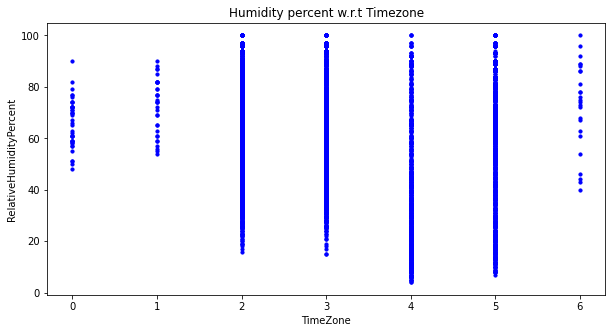

In [ ]:
#Scatter plot to show the effect of time zone on relative humidity percent
train_df.plot.scatter(x = 'TimeZone', y = 'RelativeHumidityPercent', s = 10, c = 'blue',figsize=(10, 5))
plt.title('Humidity percent w.r.t Timezone')

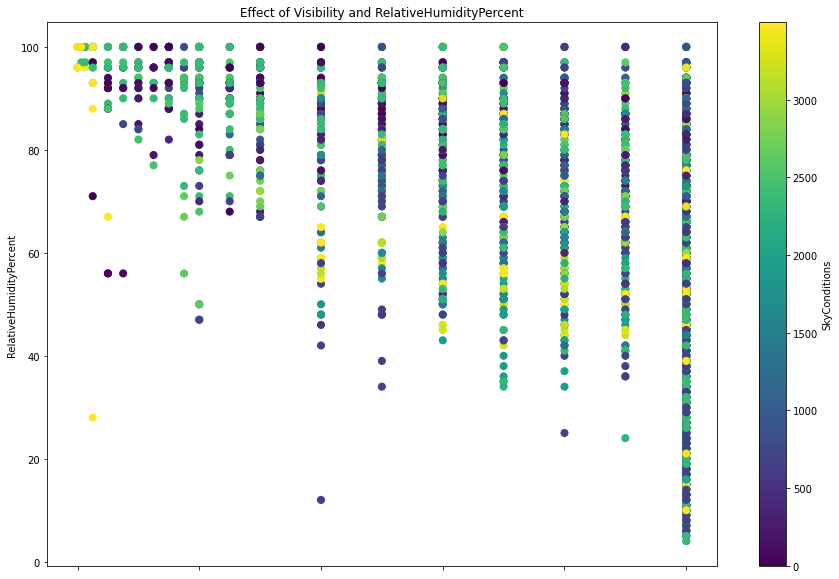

In [ ]:
#Scatter plot to show the effect of Visibility on relative humidity percent w.r.t sky conditon
train_df.plot.scatter(x = 'Visibility', y = 'RelativeHumidityPercent', s = 50, c = 'SkyConditions',
                      colormap='viridis',figsize=(15, 10))
plt.title('Effect of Visibility and RelativeHumidityPercent')
plt.xlabel("Visibility")
plt.show()

Text(0.5, 1.0, 'Effect of Visibility & SkyConditions on Flight Delay')

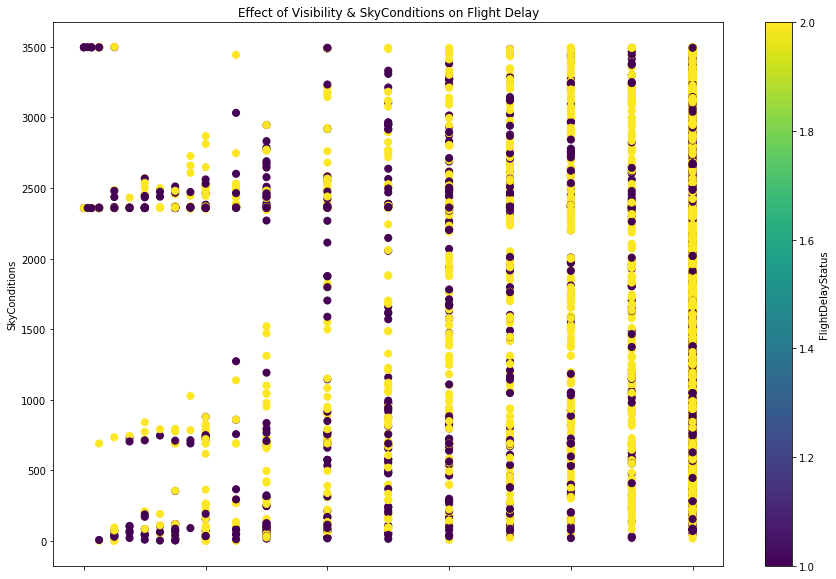

In [ ]:
#Scatter plot to show the effect of Visibility on relative humidity percent w.r.t flight delay status
train_df.plot.scatter(x = 'Visibility', y = 'SkyConditions', s = 50, c = 'FlightDelayStatus',
                      colormap='viridis',figsize=(15, 10))
plt.title('Effect of Visibility & SkyConditions on Flight Delay')

Text(0.5, 1.0, 'Effect of Latitude & Longitude on Flight Delay')

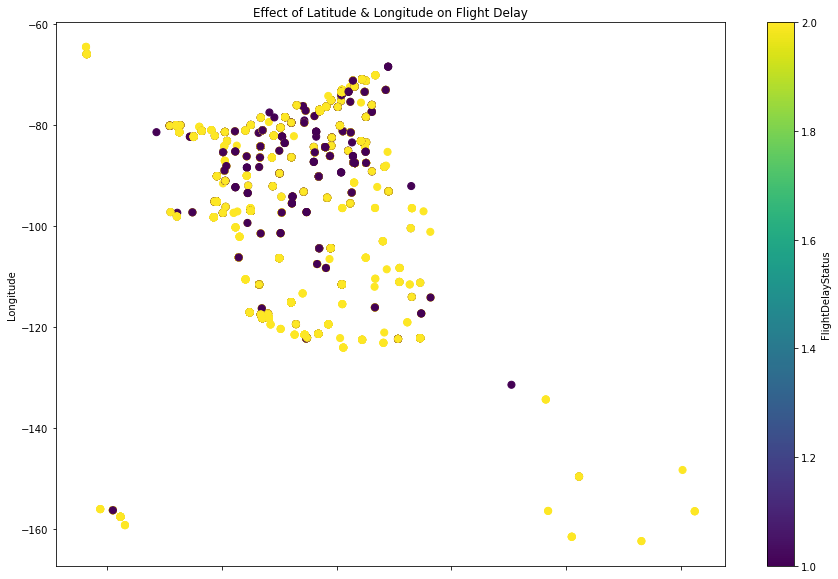

In [ ]:
#Scatter plot to show the effect of Latitude on Longitude w.r.t flight delay status
train_df.plot.scatter(x = 'Latitude', y = 'Longitude', s = 50, c = 'FlightDelayStatus',
                      colormap='viridis',figsize=(15, 10))
plt.title('Effect of Latitude & Longitude on Flight Delay')

Text(0.5, 1.0, 'Effect of Origin & Destination on Flight Delay')

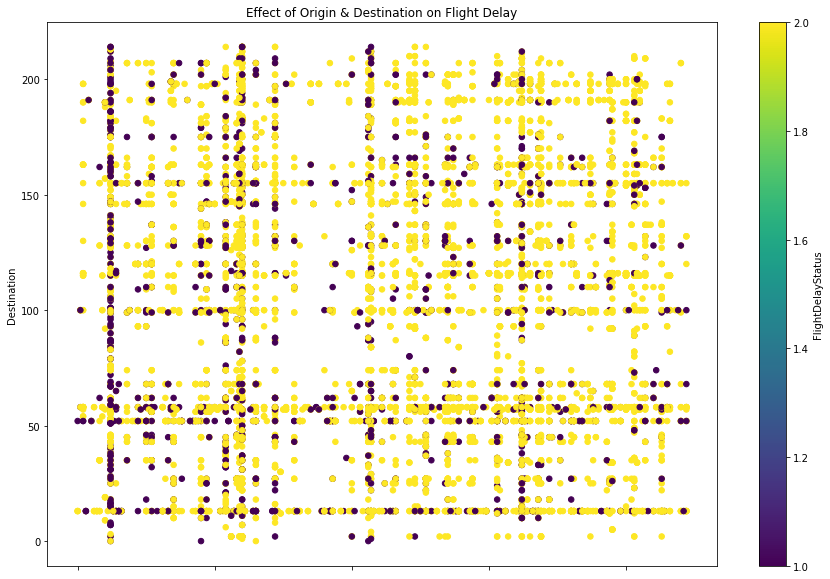

In [ ]:
#Scatter plot to show the effect of Origin on Destination w.r.t flight delay status
#an interesting pattern is observed in this plot where we can say if a flight is taken off from a perticular origin then there is a definitely a delay.
train_df.plot.scatter(x = 'Origin', y = 'Destination', s = 30, c = 'FlightDelayStatus',
                      colormap='viridis',figsize=(15, 10))
plt.title('Effect of Origin & Destination on Flight Delay')

In [ ]:
train_df_copy = train_df.copy()

In [ ]:
# Standardization of data 
scale = StandardScaler()
train_df_scaled = scale.fit_transform(train_df_copy)

In [ ]:
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns)

In [ ]:
train_df_scaled.head()

,DayOfWeek,Origin,Destination,Distance,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone,FlightDelayStatus
0,0.019716,-1.346999,1.479743,-0.424351,-0.224397,-0.615780,-2.928445,-0.961981,1.000381,4.013125,0.137363,0.503102,3.400509,-0.681166,0.128999,-1.871533,1.908879,0.489402
1,0.019716,0.927570,-0.840453,-0.453054,2.002248,1.780218,0.446917,-2.603267,1.094042,-1.115489,-0.049020,0.201596,-0.141505,0.032263,0.440908,0.482557,-0.807412,0.489402
2,0.019716,-0.177678,-0.573380,8.071694,-0.492553,0.006121,0.446917,-2.012404,-0.638693,1.448818,1.535239,0.910542,-0.141505,-0.671269,0.707449,1.123338,-0.807412,0.489402
3,0.019716,-0.818402,0.211147,-0.219604,-0.226448,-1.094165,0.446917,-1.421541,-0.966507,0.594049,0.044172,-1.053319,-0.141505,1.101995,-0.120529,-1.427341,1.908879,0.489402
4,0.019716,-1.571252,-0.039234,-0.104792,-0.548519,0.624968,-4.053566,-0.174163,1.796502,-0.047028,-0.235404,0.812756,-0.141505,-0.606936,-1.341703,-0.190573,0.098018,-2.043310


In [ ]:
train_df_scaled['FlightDelayStatus'] = train_df['FlightDelayStatus']

In [ ]:
train_df_scaled.head()

,DayOfWeek,Origin,Destination,Distance,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone,FlightDelayStatus
0,0.019716,-1.346999,1.479743,-0.424351,-0.224397,-0.615780,-2.928445,-0.961981,1.000381,4.013125,0.137363,0.503102,3.400509,-0.681166,0.128999,-1.871533,1.908879,2
1,0.019716,0.927570,-0.840453,-0.453054,2.002248,1.780218,0.446917,-2.603267,1.094042,-1.115489,-0.049020,0.201596,-0.141505,0.032263,0.440908,0.482557,-0.807412,2
2,0.019716,-0.177678,-0.573380,8.071694,-0.492553,0.006121,0.446917,-2.012404,-0.638693,1.448818,1.535239,0.910542,-0.141505,-0.671269,0.707449,1.123338,-0.807412,2
3,0.019716,-0.818402,0.211147,-0.219604,-0.226448,-1.094165,0.446917,-1.421541,-0.966507,0.594049,0.044172,-1.053319,-0.141505,1.101995,-0.120529,-1.427341,1.908879,2
4,0.019716,-1.571252,-0.039234,-0.104792,-0.548519,0.624968,-4.053566,-0.174163,1.796502,-0.047028,-0.235404,0.812756,-0.141505,-0.606936,-1.341703,-0.190573,0.098018,1


## Upsampling

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64


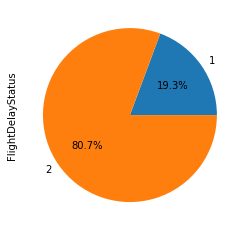

In [ ]:
# Unbalanced data to train the model
print(train_df_scaled['FlightDelayStatus'].value_counts())

train_df_scaled.groupby('FlightDelayStatus').size().plot(kind='pie',
                                       y = "FlightDelayStatus",
                                       label = "FlightDelayStatus",
                                       autopct='%1.1f%%')

In [ ]:
delayed = train_df_scaled[train_df_scaled['FlightDelayStatus'] == 1]
not_delayed = train_df_scaled[train_df_scaled['FlightDelayStatus'] == 2]
print(delayed.shape)
print(not_delayed.shape)

(1519, 18)
(6342, 18)


In [ ]:
# Upsampling of train data
delayed_upsample = resample(delayed,
             replace=True,
             n_samples=len(not_delayed),
             random_state=42)

print(delayed_upsample.shape)

(6342, 18)


In [ ]:
train_df_upsampled = pd.concat([not_delayed, delayed_upsample])

2    6342
1    6342
Name: FlightDelayStatus, dtype: int64


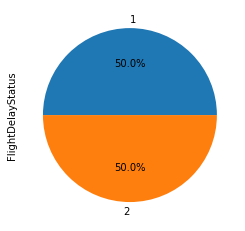

In [ ]:
# Train data percentage showing after upsampling
print(train_df_upsampled["FlightDelayStatus"].value_counts())

train_df_upsampled.groupby('FlightDelayStatus').size().plot(kind='pie',
                                       y = "FlightDelayStatus",
                                       label = "FlightDelayStatus",
                                       autopct='%1.1f%%')

In [ ]:
# Assigning features to X and y before train test split
X = train_df_upsampled.iloc[:,:-1]
y = train_df_upsampled.iloc[:,-1]

In [ ]:
print(X.columns)

Index(['DayOfWeek', 'Origin', 'Destination', 'Distance', 'WeatherStationID',
       'SkyConditions', 'Visibility', 'DBT', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'StationPressure', 'HourlyPrecip',
       'StationHeight', 'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')


In [ ]:
# Train test split to build the model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
# Shape after train test split
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(10147, 17)
(10147,)
(2537, 17)
(2537,)


In [ ]:
y_train

5050    2
4857    1
6853    2
2968    2
7748    1
       ..
4915    1
6584    2
7395    1
7774    2
1698    1
Name: FlightDelayStatus, Length: 10147, dtype: int64

## Model Building

In [ ]:
# creating a Random Forest classifier
clf = RandomForestClassifier(random_state=4)  

In [ ]:
# Setting up grid for hyper parameter tuning
grid = { 
    'n_estimators': [100,200,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Hyper parameter tuning with CV = 5
GS_rfc = GridSearchCV(estimator=clf, param_grid=grid, cv= 5)

In [ ]:
GS_rfc.fit(X_train, y_train)

In [ ]:
# Retriving best parameters for Random Forest Classifier 
GS_rfc.best_params_

In [ ]:
# Building the model
clf=RandomForestClassifier(criterion = 'gini',max_depth =  8, max_features =  'auto',n_estimators =  500)

In [ ]:
# Training the model 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [ ]:
# performing predictions on the validation dataset
y_pred = clf.predict(X_val)

In [ ]:
# metrics are used to find accuracy or error  
# using metrics module for accuracy calculation for Random Forest
print("ACCURACY OF THE MODEL: ", metrics.f1_score(y_val, y_pred))

ACCURACY OF THE MODEL:  0.7418273260687344


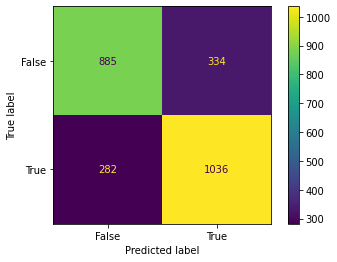

In [ ]:
# Confusion matrix for RFC
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

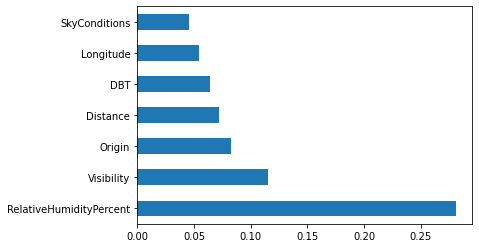

In [ ]:
# Plotting feature importance
(pd.Series(clf.feature_importances_, index=X_train.columns).nlargest(7).plot(kind='barh'))

In [ ]:
# Using logistic regression model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_val)

#Accuracy of the model using logistic regresion
print("ACCURACY OF THE MODEL (Logistic Regression): ", metrics.f1_score(y_val, y_pred))

ACCURACY OF THE MODEL (Logistic Regression):  0.6778276847692937


In [ ]:
# Using SVM model
SVC = SVC()

#fitting the model
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_val)

#Accuracy of the model using SVC
print("ACCURACY OF THE MODEL (SVC): ", metrics.f1_score(y_val, y_pred))

ACCURACY OF THE MODEL (SVC):  0.7282868525896413


In [ ]:
#reading dataset for analysis and for checking the accuracy on test data
test_df = pd.read_csv('final_test_dataset.csv')

In [ ]:
test_f1 = test_df.copy()

In [ ]:
test_df.head()

,FlightNumber,DayOfWeek,ScheduledArrTime,Origin,Destination,Distance,DateTimeStamp,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,AirportID,StationHeight,Latitude,Longitude,TimeZone
0,BGR_LGA_66457,1,700,BGR,LGA,378,2005-03-01 07:00:00,14732,FEW007 SCT015 OVC035,6.0,29.0,89.0,6.0,10,29.40,0.00,LGA,31.0,40.47,-73.53,2
1,CLT_ORD_84613,1,746,CLT,ORD,599,2005-03-01 07:46:00,94846,FEW022 SCT075 BKN200,10.0,21.0,62.0,18.0,330,29.06,0.00,ORD,674.0,41.59,-87.55,3
2,BOS_PIT_67989,1,751,BOS,PIT,496,2005-03-01 07:51:00,94823,BKN015 OVC022,6.0,28.0,85.0,10.0,230,28.19,0.01,PIT,1203.0,40.30,-80.14,2
3,ATL_XNA_81150,1,758,ATL,XNA,589,2005-03-01 07:58:00,53922,CLR,10.0,23.0,72.0,8.0,300,28.78,0.00,XNA,1319.0,36.17,-94.19,3
4,LAN_MSP_92483,1,817,LAN,MSP,455,2005-03-01 08:17:00,14922,CLR,10.0,11.0,77.0,7.0,330,29.12,0.00,MSP,838.0,44.53,-93.14,3


In [ ]:
test_df.shape

(6566, 21)

In [ ]:
test_df.isna().sum()

FlightNumber               0
DayOfWeek                  0
ScheduledArrTime           0
Origin                     0
Destination                0
Distance                   0
DateTimeStamp              0
WeatherStationID           0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
StationPressure            0
HourlyPrecip               0
AirportID                  0
StationHeight              0
Latitude                   0
Longitude                  0
TimeZone                   0
dtype: int64

In [ ]:
print(test_df['SkyConditions'].nunique())
print(test_df['Destination'].nunique())
print(test_df['Origin'].nunique())

2777
206
215


In [ ]:
#creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing
test_df['SkyConditions'] = labelencoder.fit_transform(test_df['SkyConditions'])
test_df['Destination'] = labelencoder.fit_transform(test_df['Destination'])
test_df['Origin'] = labelencoder.fit_transform(test_df['Origin'])

In [ ]:
test_df.dtypes

FlightNumber                object
DayOfWeek                    int64
ScheduledArrTime             int64
Origin                       int64
Destination                  int64
Distance                     int64
DateTimeStamp               object
WeatherStationID             int64
SkyConditions                int64
Visibility                 float64
DBT                        float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection                int64
StationPressure            float64
HourlyPrecip               float64
AirportID                   object
StationHeight              float64
Latitude                   float64
Longitude                  float64
TimeZone                     int64
dtype: object

In [ ]:
test_df.drop(['AirportID','FlightNumber','DateTimeStamp'],axis = 1,inplace = True)

In [ ]:
test_df.drop(['ScheduledArrTime'],axis = 1,inplace = True)

In [ ]:
test_df.shape

(6566, 17)

In [ ]:
scale = StandardScaler()
test_df_scaled = scale.fit_transform(test_df)

In [ ]:
test_df = pd.DataFrame(test_df_scaled, columns=test_df.columns)

In [ ]:
test_df.head()

,DayOfWeek,Origin,Destination,Distance,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,StationHeight,Latitude,Longitude,TimeZone
0,-0.990295,-1.427885,0.222983,-0.735110,-0.523127,-0.965276,-1.404187,-2.044315,1.486636,-0.528949,-1.516648,0.212811,-0.111098,-0.653978,0.686353,1.141866,-0.806725
1,-0.990295,-1.035183,0.827108,-0.317179,1.916934,-0.617849,0.442943,-2.472645,0.238051,2.035472,1.433908,-0.076951,-0.111098,-0.108262,0.900280,0.262101,0.110815
2,-0.990295,-1.325441,1.016976,-0.511961,1.916234,-1.570389,-1.404187,-2.097856,1.301660,0.325858,0.511859,-0.818401,0.057137,0.340701,0.653882,0.727083,-0.806725
3,-0.990295,-1.581550,1.810969,-0.336090,0.670497,-1.051171,0.442943,-2.365563,0.700490,-0.101546,1.157294,-0.315578,-0.111098,0.439151,-0.134976,-0.154564,0.110815
4,-0.990295,0.057551,0.671762,-0.589496,-0.517341,-1.051171,0.442943,-3.008059,0.931709,-0.315248,1.433908,-0.025816,-0.111098,0.030925,1.461840,-0.088676,0.110815


In [ ]:
#Using model to predict the flight delay status on test data
y_test = clf.predict(test_df)

In [ ]:
y_test

array([1, 2, 1, ..., 1, 1, 1])

In [ ]:
prediction_df = pd.DataFrame({'FlightNumber': test_f1['FlightNumber'], 'FlightDelayStatus': y_test})

In [ ]:
prediction_df.head()

,FlightNumber,FlightDelayStatus
0,BGR_LGA_66457,1
1,CLT_ORD_84613,2
2,BOS_PIT_67989,1
3,ATL_XNA_81150,1
4,LAN_MSP_92483,1


In [ ]:
#Saving the final for validating accuracy present in the database
prediction_df.to_csv('Dhanush_b112_4692_upsampled_2(GC).csv',index = False)

In [ ]:
#When compared with the dataset result available in database, the accuracy was found to be considerate for a value of 0.54.
#there is a scope for improvement, there are chances where the model is overfitting. Hence decreasing the features furthermore can give the good result.